<a href="https://colab.research.google.com/github/Pouyaaskari/Digit-Recognition-with-Neural-Network/blob/master/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1-Import necessary libraries

In [39]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

#2-Loading dataset

In [40]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

In [41]:
len(xtrain)

60000

In [42]:
len(xtest)

10000

In [43]:
xtrain.shape[0]

60000

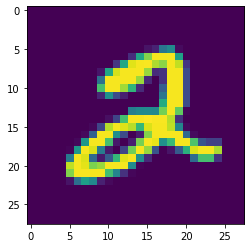

In [44]:
plt.imshow(xtrain[5])

In [45]:
ytrain[5]

2

In [46]:
ytrain[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

#3-Scale the xtrain & xtest

In [47]:
xtrain=xtrain.astype("float32")/255.0
xtest=xtest.astype("float32")/255.

#4-build a simple Network

In [55]:
model=keras.Sequential([
                        keras.layers.Flatten(),
                        keras.layers.Dense(10,input_shape=(784,),activation="softmax")
])

In [56]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [57]:
history=model.fit(xtrain,ytrain,epochs=10,batch_size=32,validation_data=(xtest,ytest))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4671 - accuracy: 0.8786 - val_loss: 0.3074 - val_accuracy: 0.9165
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3035 - accuracy: 0.9148 - val_loss: 0.2851 - val_accuracy: 0.9197
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.9201 - val_loss: 0.2763 - val_accuracy: 0.9224
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9233 - val_loss: 0.2739 - val_accuracy: 0.9232
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9253 - val_loss: 0.2682 - val_accuracy: 0.9265
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2618 - accuracy: 0.9265 - val_loss: 0.2676 - val_accuracy: 0.9257
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2579 - accuracy: 0.9290 - val_loss: 0.2634 - val_accuracy:

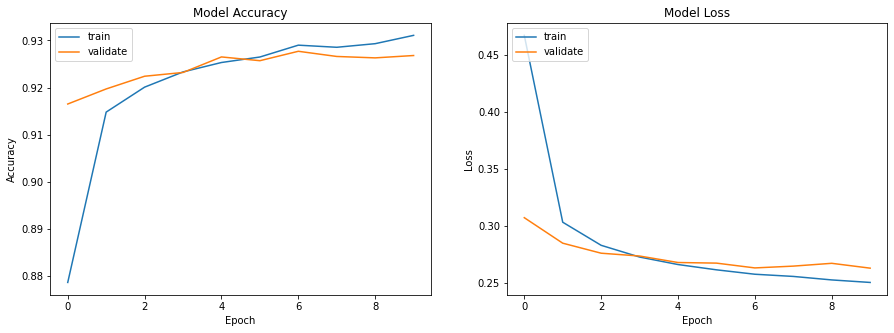

In [58]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
axs[0].plot(history.history['accuracy']) 
axs[0].plot(history.history['val_accuracy']) 
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy') 
axs[0].set_xlabel('Epoch')
axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
axs[1].plot(history.history['loss']) 
axs[1].plot(history.history['val_loss']) 
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss') 
axs[1].set_xlabel('Epoch')
axs[1].legend(['train', 'validate'], loc='upper left')
plt.show()

#5-Predict xtest

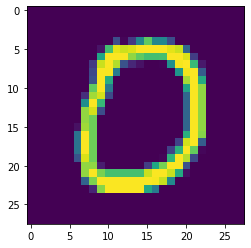

In [64]:
plt.imshow(xtest[10])

In [61]:
prediction=model.predict(xtest)

In [65]:
prediction[10]

array([9.9145848e-01, 1.5743731e-10, 9.3074609e-04, 9.3110561e-05,
       1.3808693e-07, 5.6796074e-03, 3.9952396e-05, 2.8964457e-09,
       1.7962805e-03, 1.6907499e-06], dtype=float32)

In [66]:
np.argmax(prediction[10])

0

In [67]:
prediction_labels=[np.argmax(i) for i in prediction]

#6-build confusion matrix

In [68]:
tf.math.confusion_matrix(labels=ytest,predictions=prediction_labels)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    2,    2,    0,    4,    5,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   6,   12,  917,   19,    6,    3,   11,   12,   42,    4],
       [   2,    0,   17,  932,    1,   20,    2,    9,   21,    6],
       [   1,    1,    5,    2,  918,    0,    7,    4,   10,   34],
       [   8,    3,    1,   39,    8,  769,   13,    7,   37,    7],
       [  11,    3,    8,    1,    7,   13,  911,    1,    3,    0],
       [   1,    7,   19,    8,    8,    1,    0,  949,    2,   33],
       [   7,   13,    5,   23,    9,   19,    9,   12,  869,    8],
       [  10,    8,    1,   10,   25,    5,    0,   22,    6,  922]],
      dtype=int32)>

Text(69.0, 0.5, 'Real')

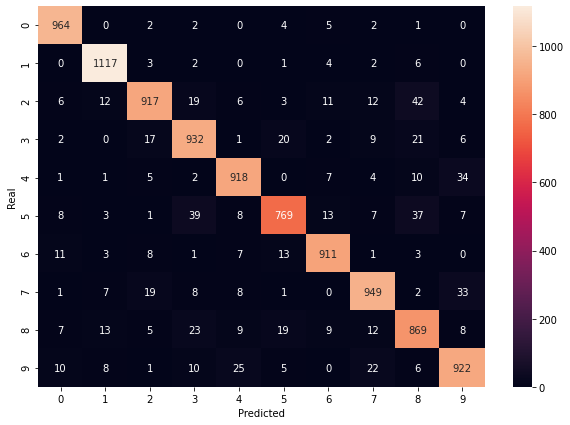

In [69]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(tf.math.confusion_matrix(labels=ytest,predictions=prediction_labels),annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Real')

#7-Add some hidden layers

In [71]:
model=keras.Sequential([
                        keras.layers.Flatten(),
                        keras.layers.Dense(100,input_shape=(784,),activation="relu"),
                        keras.layers.Dense(10,activation="softmax")
])

In [72]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [73]:
history=model.fit(xtrain,ytrain,epochs=10,batch_size=32,validation_data=(xtest,ytest))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2749 - accuracy: 0.9219 - val_loss: 0.1470 - val_accuracy: 0.9558
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1239 - accuracy: 0.9631 - val_loss: 0.1123 - val_accuracy: 0.9668
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0870 - accuracy: 0.9733 - val_loss: 0.0934 - val_accuracy: 0.9713
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0666 - accuracy: 0.9795 - val_loss: 0.0781 - val_accuracy: 0.9764
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0525 - accuracy: 0.9837 - val_loss: 0.0823 - val_accuracy: 0.9749
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0427 - accuracy: 0.9868 - val_loss: 0.0817 - val_accuracy: 0.9753
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0356 - accuracy: 0.9894 - val_loss: 0.0792 - val_accuracy:

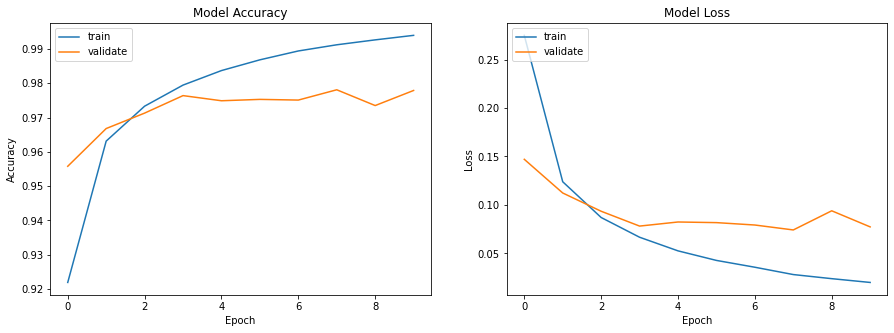

In [74]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
axs[0].plot(history.history['accuracy']) 
axs[0].plot(history.history['val_accuracy']) 
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy') 
axs[0].set_xlabel('Epoch')
axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
axs[1].plot(history.history['loss']) 
axs[1].plot(history.history['val_loss']) 
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss') 
axs[1].set_xlabel('Epoch')
axs[1].legend(['train', 'validate'], loc='upper left')
plt.show()

#8-Let's change optimizer & loss functions and metrics



In [80]:
opt=tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD'
)

In [81]:
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [83]:
history=model.fit(xtrain,ytrain,epochs=30,batch_size=32,validation_data=(xtest,ytest))

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0058 - accuracy: 0.9993 - val_loss: 0.0708 - val_accuracy: 0.9796
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0056 - accuracy: 0.9994 - val_loss: 0.0707 - val_accuracy: 0.9804
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0055 - accuracy: 0.9994 - val_loss: 0.0711 - val_accuracy: 0.9802
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0054 - accuracy: 0.9994 - val_loss: 0.0710 - val_accuracy: 0.9801
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0053 - accuracy: 0.9995 - val_loss: 0.0714 - val_accuracy: 0.9799
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0052 - accuracy: 0.9995 - val_loss: 0.0712 - val_accuracy: 0.9801
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0052 - accuracy: 0.9995 - val_loss: 0.0716 - val_accuracy:

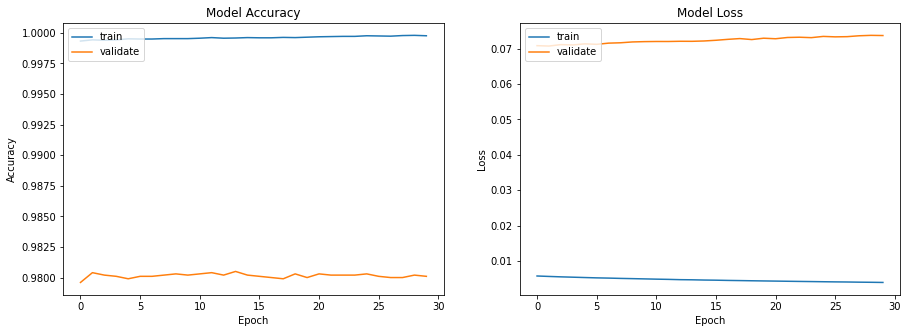

In [84]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
axs[0].plot(history.history['accuracy']) 
axs[0].plot(history.history['val_accuracy']) 
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy') 
axs[0].set_xlabel('Epoch')
axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
axs[1].plot(history.history['loss']) 
axs[1].plot(history.history['val_loss']) 
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss') 
axs[1].set_xlabel('Epoch')
axs[1].legend(['train', 'validate'], loc='upper left')
plt.show()

Text(69.0, 0.5, 'Real')

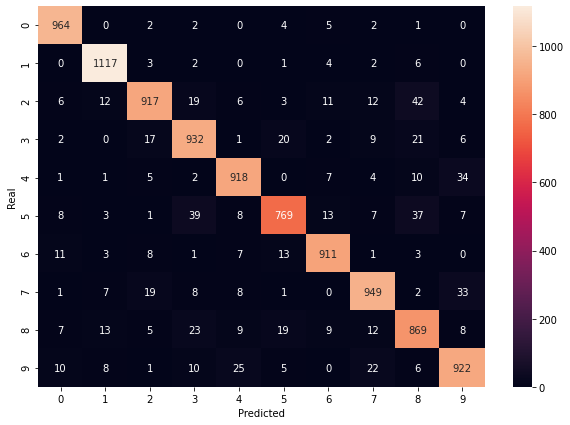

In [85]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(tf.math.confusion_matrix(labels=ytest,predictions=prediction_labels),annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Real')